In [8]:
import os
print(os.getcwd())



/content


In [9]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


**Penjelasan Dataset yang digunakan**

In [17]:
# Kasus yang diambil:
# Dataset ini berisi kumpulan artikel penelitian dari berbagai bidang seperti Computer Science, Physics, Mathematics, Statistics, Quantitative Biology, dan Quantitative Finance.
# Tujuannya adalah untuk melakukan pemodelan topik (Topic Modeling) agar dapat mengetahui tema utama dari kumpulan abstrak penelitian tersebut.

# Penjelasan setiap kolom:
# - ID: Nomor unik untuk setiap artikel.
# - TITLE: Judul artikel penelitian.
# - ABSTRACT: Abstrak atau ringkasan isi artikel.
# - Computer Science, Physics, Mathematics, Statistics, Quantitative Biology, Quantitative Finance:
#   Kolom biner (0/1) yang menunjukkan bidang penelitian artikel tersebut.

# Import library
import pandas as pd

# Load data
data = pd.read_csv("train.csv")
data.head()



,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


**Data Understanding**

Jumlah baris data: 20972
Rata-rata panjang teks (abstrak): 1009.1033759298111
Jumlah data duplikat: 0

Jumlah data kosong per kolom:
 ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
text_length             0
dtype: int64


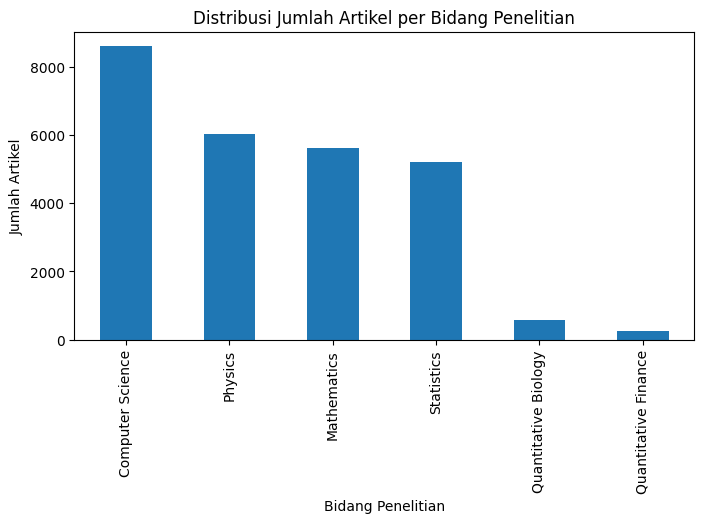

In [11]:
# 1. Jumlah baris data
print("Jumlah baris data:", len(data))

# 2. Panjang rata-rata setiap abstrak
data['text_length'] = data['ABSTRACT'].apply(lambda x: len(str(x)))
print("Rata-rata panjang teks (abstrak):", data['text_length'].mean())

# 3. Cek data duplikasi
print("Jumlah data duplikat:", data.duplicated().sum())

# 4. Cek data kosong
print("\nJumlah data kosong per kolom:\n", data.isnull().sum())

# 5. Distribusi data per bidang penelitian
import matplotlib.pyplot as plt

fields = ['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']
data[fields].sum().plot(kind='bar', figsize=(8,4))
plt.title("Distribusi Jumlah Artikel per Bidang Penelitian")
plt.xlabel("Bidang Penelitian")
plt.ylabel("Jumlah Artikel")
plt.show()


**Data Text Processing**

In [13]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Membersihkan teks (hapus angka, tanda baca, huruf kecil)
import re
data['clean_text'] = data['ABSTRACT'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x).lower()))

# 2. Tokenisasi
from nltk.tokenize import word_tokenize
data['tokens'] = data['clean_text'].apply(word_tokenize)

# 3. Stopword removal
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# 4. Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['tokens'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Lihat hasil
data[['ABSTRACT', 'tokens']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,ABSTRACT,tokens
0,Predictive models allow subject-specific inf...,"[predictive, model, allow, subjectspecific, in..."
1,Rotation invariance and translation invarian...,"[rotation, invariance, translation, invariance..."
2,We introduce and develop the notion of spher...,"[introduce, develop, notion, spherical, polyha..."
3,The stochastic Landau--Lifshitz--Gilbert (LL...,"[stochastic, landaulifshitzgilbert, llg, equat..."
4,Fourier-transform infra-red (FTIR) spectra o...,"[fouriertransform, infrared, ftir, spectrum, s..."


**Data Modeling**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Gabungkan token jadi teks utuh
data['processed_text'] = data['tokens'].apply(lambda x: ' '.join(x))

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_df=0.9, min_df=10)
tfidf = vectorizer.fit_transform(data['processed_text'])

# Model LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf)

# Tampilkan 3 topik teratas
for i, topic in enumerate(lda.components_[:3]):
    print(f"\nTopik {i+1}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-5:][::-1]])



Topik 1:
['model', 'network', 'data', 'method', 'algorithm']

Topik 2:
['group', 'function', 'equation', 'space', 'prove']

Topik 3:
['market', 'price', 'volatility', 'stock', 'portfolio']


In [ ]:
!pip install wordcloud


**Visualisasi Topic yang dimunculkan menggunakan tabel, barchart dan sebagainya**

Jumlah data: 20972
Contoh preprocessing:


,ABSTRACT,clean_text_joined
0,Predictive models allow subject-specific inf...,predictive model allow subjectspecific inferen...
1,Rotation invariance and translation invarian...,rotation invariance translation invariance gre...
2,We introduce and develop the notion of spher...,introduce develop notion spherical polyharmoni...


Ukuran matriks TF-IDF: (20972, 5000)
Topik 1: algorithm, problem, method, model, distribution, function, data, matrix, time, parameter
Topik 2: equation, field, group, quantum, space, state, theory, system, result, function
Topik 3: network, model, data, learning, method, approach, system, neural, task, image


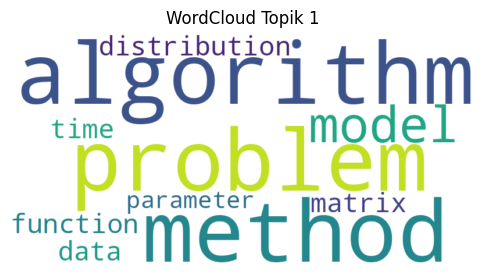

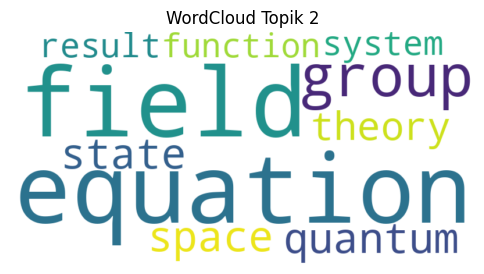

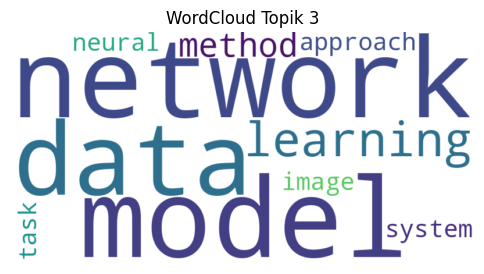

In [15]:
# --------- FULL PREPROCESS + TF-IDF + LDA + VISUALISASI
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# download resources NLTK bila belum
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# 1) Load data (pastikan train.csv ada di folder kerja)
data = pd.read_csv("train.csv")
print("Jumlah data:", len(data))

# 2) Cleaning: huruf kecil, hapus non-alfabet
data['clean_text'] = data['ABSTRACT'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x).lower()))

# 3) Tokenisasi
data['tokens'] = data['clean_text'].apply(word_tokenize)

# 4) Stopword removal
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda tokens: [w for w in tokens if w not in stop_words and w.isalpha()])

# 5) Lemmatization
lemmatizer = WordNetLemmatizer()
data['tokens'] = data['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(w) for w in tokens])

# 6) Gabungkan kembali tokens menjadi teks
data['clean_text_joined'] = data['tokens'].apply(lambda tokens: " ".join(tokens))

# tampilkan contoh
print("Contoh preprocessing:")
display(data[['ABSTRACT', 'clean_text_joined']].head(3))

# 7) TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text_joined'])
print("Ukuran matriks TF-IDF:", tfidf_matrix.shape)

# 8) LDA
n_topics = 3
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(tfidf_matrix)

# Ambil top words per topic
num_words = 10
feature_names = tfidf_vectorizer.get_feature_names_out()
top_words = {}
for idx, topic in enumerate(lda.components_):
    top = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
    top_words[idx] = top
    print(f"Topik {idx+1}: {', '.join(top)}")

# 9) Visualisasi wordcloud per topik
for i, words in top_words.items():
    plt.figure(figsize=(6,4))
    wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Topik {i+1}")
    plt.show()
# ---------------------------------------------------------------------------------------




**Gunakan implementasi menggunakan PCA atau T-sne untuk tahap lanjutan**

Langkah: Visualisasi lanjutan dengan PCA dan t-SNE

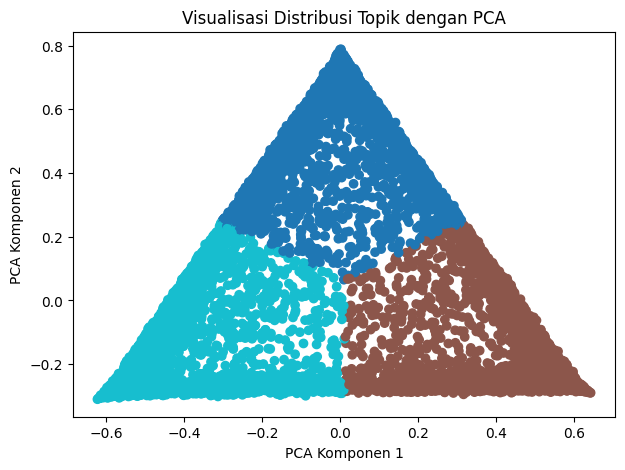

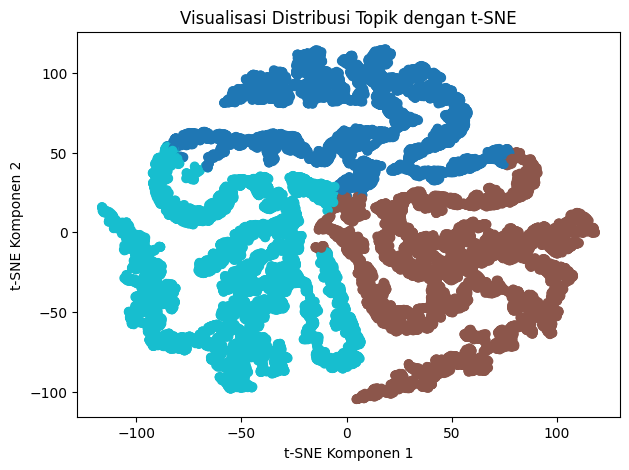

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Ambil distribusi topik dari model LDA
topic_distribution = lda.transform(tfidf_matrix)

# --- PCA ---
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(topic_distribution)

plt.figure(figsize=(7,5))
plt.scatter(pca_result[:,0], pca_result[:,1], c=topic_distribution.argmax(axis=1), cmap='tab10')
plt.title("Visualisasi Distribusi Topik dengan PCA")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.show()

# --- t-SNE ---
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_result = tsne.fit_transform(topic_distribution)

plt.figure(figsize=(7,5))
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=topic_distribution.argmax(axis=1), cmap='tab10')
plt.title("Visualisasi Distribusi Topik dengan t-SNE")
plt.xlabel("t-SNE Komponen 1")
plt.ylabel("t-SNE Komponen 2")
plt.show()

